# Importing the libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Loading the preprocessed data

In [8]:
preprocessed_heart_df = pd.read_csv('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/data/heart_disease/preprocessed_heart_data.csv')


# Separate the features and the target variable

In [9]:
X = preprocessed_heart_df.drop('target', axis=1)
y = preprocessed_heart_df['target']

# Split the dataset into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Random Forest Model

In [11]:


# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate and print the training and testing accuracy
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test))


Best Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy:  0.9173553719008265
Testing Accuracy:  0.8852459016393442


# Confusion Matrix for Training Set

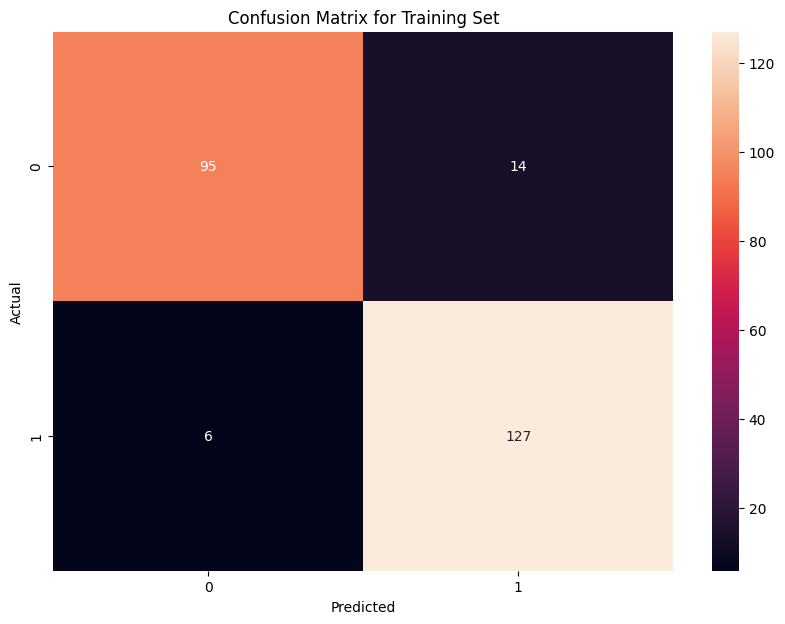

In [12]:
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt='d')
plt.title('Confusion Matrix for Training Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Confusion Matrix for Testing Set

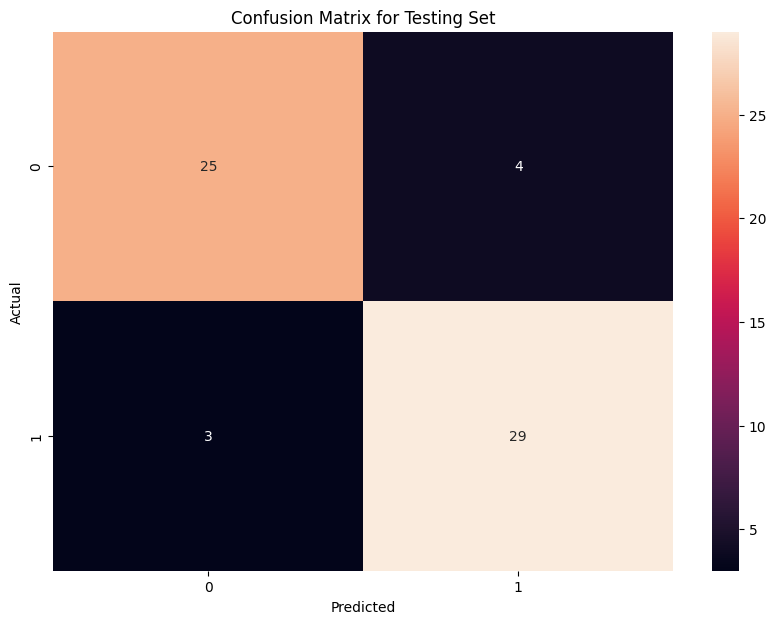

In [13]:
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title('Confusion Matrix for Testing Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve for Testing Set

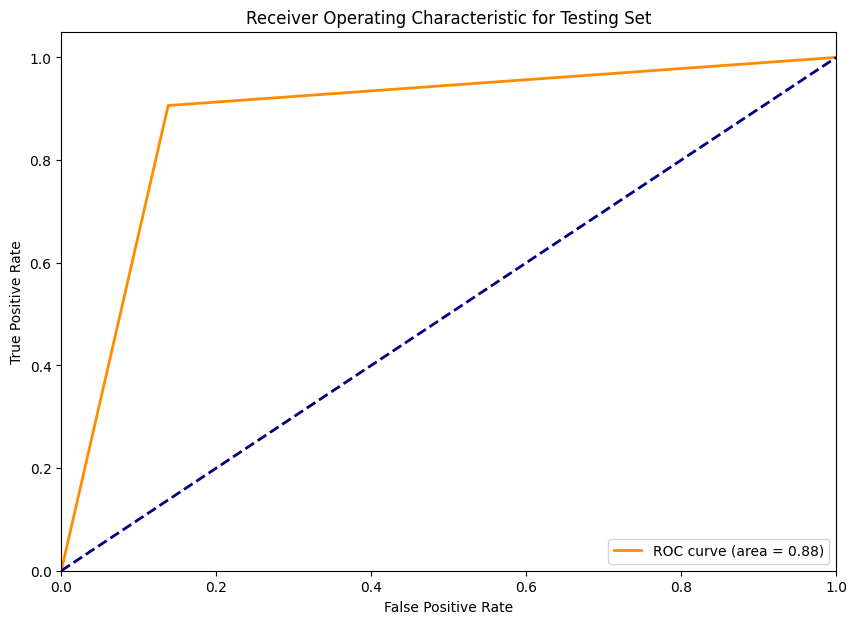

In [14]:
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 7))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Testing Set')
plt.legend(loc="lower right")
plt.show()

# classification report for the testing set

In [16]:
# Generate and print the classification report for the testing set
report = classification_report(y_test, y_pred_test)
print("Classification Report for Testing Set:\n", report)

Classification Report for Testing Set:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Save the model

In [17]:
import pickle

# Assuming best_model is your trained Random Forest model
# Save the model to a file
with open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/heart_disease/random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully.")


Model saved successfully.


# Load the model

In [18]:
# Load the model from the file
with open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/heart_disease/random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully.")


Model loaded successfully.


In [2]:
import pickle
import numpy as np

# Load the diabetes model
model_path = 'C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/diabetes/random_forest_model.pkl'
with open(model_path, 'rb') as file:
    diabetes_model = pickle.load(file)

# Example input data for diabetes
input_data = {
    'Pregnancies': 6,
    'Glucose': 148.0,
    'BloodPressure': 72.0,
    'SkinThickness': 35.0,
    'Insulin': 169.5,
    'BMI': 33.6,
    'DiabetesPedigreeFunction': 0.627,
    'Age': 50
}

# Transform the input data according to your logic
dic2 = {'NewBMI_Obesity 1': 0, 'NewBMI_Obesity 2': 0, 'NewBMI_Obesity 3': 0, 'NewBMI_Overweight': 0,
        'NewBMI_Underweight': 0, 'NewInsulinScore_Normal': 0, 'NewGlucose_Low': 0,
        'NewGlucose_Normal': 0, 'NewGlucose_Overweight': 0, 'NewGlucose_Secret': 0}

if input_data['BMI'] <= 18.5:
    dic2['NewBMI_Underweight'] = 1
elif 18.5 < input_data['BMI'] <= 24.9:
    pass
elif 24.9 < input_data['BMI'] <= 29.9:
    dic2['NewBMI_Overweight'] = 1
elif 29.9 < input_data['BMI'] <= 34.9:
    dic2['NewBMI_Obesity 1'] = 1
elif 34.9 < input_data['BMI'] <= 39.9:
    dic2['NewBMI_Obesity 2'] = 1
elif input_data['BMI'] > 39.9:
    dic2['NewBMI_Obesity 3'] = 1

if 16 <= input_data['Insulin'] <= 166:
    dic2['NewInsulinScore_Normal'] = 1

if input_data['Glucose'] <= 70:
    dic2['NewGlucose_Low'] = 1
elif 70 < input_data['Glucose'] <= 99:
    dic2['NewGlucose_Normal'] = 1
elif 99 < input_data['Glucose'] <= 126:
    dic2['NewGlucose_Overweight'] = 1
elif input_data['Glucose'] > 126:
    dic2['NewGlucose_Secret'] = 1

input_data.update(dic2)
values2 = list(map(float, list(input_data.values())))

# Make a prediction
values = np.asarray(values2)
prediction = diabetes_model.predict(values.reshape(1, -1))[0]

print("Prediction:", prediction)


Prediction: 1


C:\Users\SIDDHI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
